In [103]:
import mlrose_hiive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, validation_curve, learning_curve
import warnings
import time
warnings.filterwarnings('ignore')
from random import randint

In [104]:
model_labels = ['Random Hill Climb', 'Simulated Annealing', 'Genetic Algorithm', 'MIMIC']
random_state = [([0, 0, 1, 0, 0, 0, 0, 0, 1, 1], 10), ([0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1], 30), ([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1], 50), ([1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0], 70), ([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1], 90), ([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1], 110)]
weights = [48, 8, 34, 13, 12, 23, 21, 45, 17, 26, 12, 28, 25, 21, 26, 40, 8, 11, 21, 13, 25, 17, 46, 29, 19, 3, 12, 7, 42, 29, 30, 14, 24, 9, 48, 3, 22, 49, 9, 44, 14, 37, 37, 40, 41, 35, 12, 46, 38, 41, 19, 18, 7, 29, 18, 25, 37, 44, 4, 25, 19, 13, 25, 12, 6, 13, 2, 30, 37, 15, 3, 33, 36, 47, 16, 23, 47, 34, 37, 4, 49, 32, 48, 36, 15, 48, 3, 37, 39, 11, 46, 35, 23, 46, 41, 49, 24, 7, 47, 6, 8, 22, 28, 32, 49, 8, 45, 31, 3, 46, 20, 46, 30, 8, 41, 42, 11, 38, 13, 4, 11, 49, 17, 18, 22, 46, 5, 10, 17, 24]
values = [4, 6, 5, 9, 4, 8, 5, 1, 1, 6, 6, 7, 4, 4, 1, 8, 8, 6, 8, 8, 1, 6, 2, 6, 5, 7, 9, 8, 9, 4, 8, 1, 3, 2, 2, 4, 5, 3, 7, 1, 1, 1, 3, 6, 2, 4, 7, 7, 9, 4, 9, 7, 2, 5, 9, 3, 1, 1, 2, 2, 5, 6, 1, 6, 6, 6, 9, 1, 7, 5, 3, 2, 9, 4, 1, 4, 8, 1, 4, 8, 4, 6, 8, 2, 4, 3, 2, 6, 2, 6, 1, 5, 3, 2, 8, 2, 4, 2, 8, 1, 6, 6, 1, 2, 7, 4, 9, 8, 2, 6, 5, 6, 4, 7, 2, 8, 7, 9, 6, 1, 8, 6, 9, 7, 7, 1, 5, 9, 3, 8]


In [105]:
def discrete(l, fit, mx, val):
    problem = mlrose_hiive.DiscreteOpt(length = l, fitness_fn = fit, maximize = mx, max_val = val)
    return problem

def hill_climb(problem, itr, state):
    opt= mlrose_hiive.random_hill_climb(problem, max_attempts=1000,max_iters = itr, 
                                         restarts=10, init_state=state, curve=True, random_state=10)
    return opt

def annealing(problem, itr, state):
    schedule = mlrose_hiive.ExpDecay(exp_const=0.01)
    
    opt = mlrose_hiive.simulated_annealing(problem, schedule = schedule, 
                                           max_attempts=1000, max_iters=itr, init_state=state, curve=True, random_state=10)
    return opt

def genetic(problem, itr):
    opt = mlrose_hiive.genetic_alg(problem, pop_size=640, 
                                                        mutation_prob=0.05, max_attempts=1000, max_iters=itr, curve=True, random_state=10)
    return opt

def mimic(problem, itr):
    opt = mlrose_hiive.mimic(problem, pop_size=160, 
                                                 max_attempts=100, max_iters=itr, curve=True, random_state=10)
    return opt

In [106]:
def fourpeak(state, l, mx, val, itr):
    fitness = mlrose_hiive.FourPeaks(t_pct=0.15)
    problem = discrete(l, fitness, mx, val)
    
    
    
    start = time.time()
    rhc = hill_climb(problem, itr, state)
    rhc_t.append(time.time()-start)
    rhc_fit.append(rhc[1])
    
    
    start = time.time()
    sa = annealing(problem, itr, state)
    sa_t.append(time.time()-start)
    sa_fit.append(sa[1])
    
    
    start = time.time()
    ga = genetic(problem, itr)
    ga_t.append(time.time()-start)
    ga_fit.append(ga[1])
    
    start = time.time()
    mm = mimic(problem, itr)
    mm_t.append(time.time()-start)
    mm_fit.append(mm[1])


    
    

In [107]:
def contpeak(state, l, mx, val, itr):
    fitness = mlrose_hiive.ContinuousPeaks(t_pct=0.15)
    problem = discrete(l, fitness, mx, val)
    
    start = time.time()
    rhc = hill_climb(problem, itr, state)
    rhc_t2.append(time.time()-start)
    rhc_fit2.append(rhc[1])
    
    
    start = time.time()
    sa = annealing(problem, itr, state)
    sa_t2.append(time.time()-start)
    sa_fit2.append(sa[1])
    
    
    start = time.time()
    ga = genetic(problem, itr)
    ga_t2.append(time.time()-start)
    ga_fit2.append(ga[1])
    
    start = time.time()
    mm = mimic(problem, itr)
    mm_t2.append(time.time()-start)
    mm_fit2.append(mm[1])


In [108]:
def ksack(state, l, mx, val, itr, weights, values):
    
    
    
    fitness = mlrose_hiive.Knapsack(weights, values, 0.6)
    problem = discrete(l, fitness, mx, val)
    
    
    start = time.time()
    rhc = hill_climb(problem, itr, state)
    rhc_t3.append(time.time()-start)
    rhc_fit3.append(rhc[1])
    
    
    start = time.time()
    sa = annealing(problem, itr, state)
    sa_t3.append(time.time()-start)
    sa_fit3.append(sa[1])
    
    
    start = time.time()
    ga = genetic(problem, itr)
    ga_t3.append(time.time()-start)
    ga_fit3.append(ga[1])
    
    start = time.time()
    mm = mimic(problem, itr)
    mm_t3.append(time.time()-start)
    mm_fit3.append(mm[1])


In [109]:
def plotting(labels, data, rang, x, y, title, file):
    plt.figure()
    for label, arr in zip(labels, data):
        plt.plot(rang, arr, label=label)
    plt.legend()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.savefig(file, dpi = 1200)

In [110]:
itr = 100000

rhc_fit = []
sa_fit = []
ga_fit = []
mm_fit =[]

rhc_t = []
sa_t = []
ga_t = []
mm_t = []

for state, l in random_state:
    fourpeak(state, l, True, 2, itr)
    
   

In [111]:
rhc_fit2 = []
sa_fit2 = []
ga_fit2 = []
mm_fit2 =[]

rhc_t2 = []
sa_t2= []
ga_t2 = []
mm_t2 = []
for state, l in random_state:
    contpeak(state, l, True, 2, itr)


In [112]:
# weights = np.random.randint(low = 1, high = 50,size=130)
# values = np.random.randint(low = 1, high = 10,size=130)

In [113]:
rhc_fit3 = []
sa_fit3 = []
ga_fit3 = []
mm_fit3 =[]

rhc_t3 = []
sa_t3= []
ga_t3 = []
mm_t3 = []
for state, l in random_state:
    ksack(state, l, True, 2, itr, np.array(weights[:l]), np.array(values[:l]))



ValueError: x and y must have same first dimension, but have shapes (6,) and (4,)

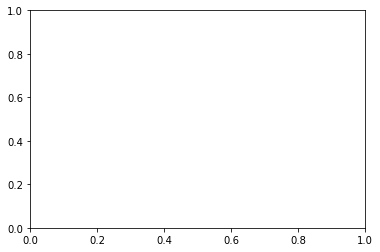

In [125]:
plotting(model_labels, [rhc_fit, sa_fit, ga_fit, mm_fit],np.arange(10,130,20), 
         'Input Size', 'Fitness', 'FourPeaks Fitness Value vs. Input Size', 'fp_fit_size.png')
plotting(model_labels, [rhc_t, sa_t, ga_t, mm_t], np.arange(10,130,20), 
         'Input Size', 'Elapsed Time (s)', 'FourPeaks Elapsed Time vs. Input Size', 'fp_time_size.png')

plotting(model_labels, [rhc_fit2, sa_fit2, ga_fit2, mm_fit2],np.arange(10,130,20), 
         'Input Size', 'Fitness', 'ContinuousPeaks Fitness Value vs. Input Size', 'cp_fit_size.png')
plotting(model_labels, [rhc_t2, sa_t2, ga_t2, mm_t2], np.arange(10,130,20), 
         'Input Size', 'Elapsed Time (s)', 'ContinuousPeaks Elapsed Time vs. Input Size', 'cp_time_size.png')

plotting(model_labels, [rhc_fit3, sa_fit3, ga_fit3, mm_fit3],np.arange(10,130,20), 
         'Input Size', 'Fitness', 'Knapsack Fitness Value vs. Input Size', 'kp_fit_size.png')
plotting(model_labels, [rhc_t3, sa_t3, ga_t3, mm_t3], np.arange(10,130,20), 
         'Input Size', 'Elapsed Time (s)', 'Knapsack Elapsed Time vs. Input Size', 'kp_time_size.png')


In [115]:
itr_arr = []
for i in range(1,5):
    itr_arr = [itr//10**i] + itr_arr

    
rhc_fit = []
sa_fit = []
ga_fit = []
mm_fit =[]

rhc_t = []
sa_t = []
ga_t = []
mm_t = []
    
for itrs in itr_arr:
    fourpeak(random_state[-1][0], random_state[-1][1], True, 2, itrs)


In [116]:
itr_arr

[10, 100, 1000, 10000]

In [117]:
rhc_fit2 = []
sa_fit2 = []
ga_fit2 = []
mm_fit2 =[]

rhc_t2 = []
sa_t2= []
ga_t2 = []
mm_t2 = []
for itrs in itr_arr:
    contpeak(random_state[-1][0], random_state[-1][1], True, 2, itrs)

In [118]:
rhc_fit3 = []
sa_fit3 = []
ga_fit3 = []
mm_fit3 =[]

rhc_t3 = []
sa_t3= []
ga_t3 = []
mm_t3 = []
l = random_state[-1][1]
for itrs in itr_arr:
    ksack(random_state[-1][0], l, True, 2, itrs, np.array(weights[:l]), np.array(values[:l]))

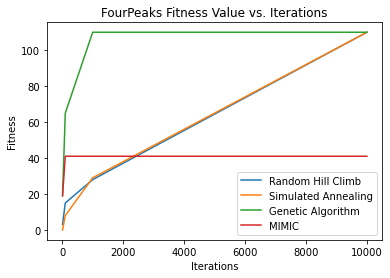

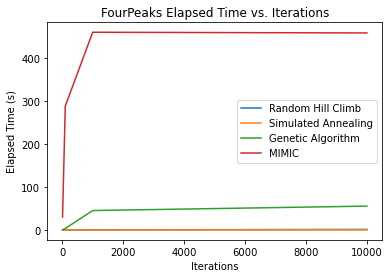

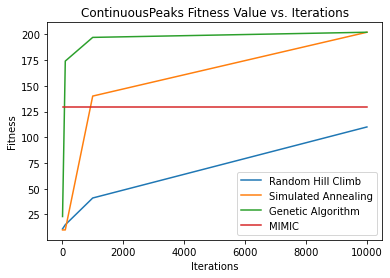

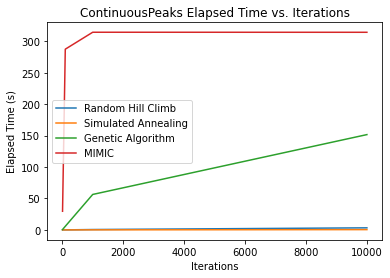

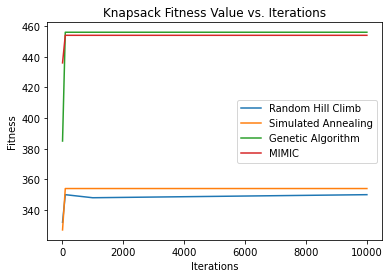

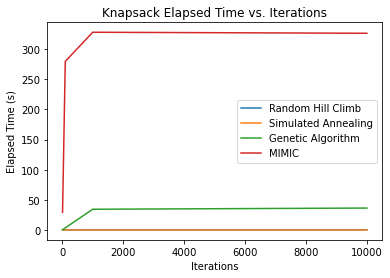

In [121]:
plotting(model_labels, [rhc_fit, sa_fit, ga_fit, mm_fit],np.array(itr_arr), 
         'Iterations', 'Fitness', 'FourPeaks Fitness Value vs. Iterations', 'fp_fit_itr.png')
plotting(model_labels, [rhc_t, sa_t, ga_t, mm_t], np.array(itr_arr), 
         'Iterations', 'Elapsed Time (s)', 'FourPeaks Elapsed Time vs. Iterations', 'fp_time_itr.png')

plotting(model_labels, [rhc_fit2, sa_fit2, ga_fit2, mm_fit2],np.array(itr_arr), 
         'Iterations', 'Fitness', 'ContinuousPeaks Fitness Value vs. Iterations', 'cp_fit_itr.png')
plotting(model_labels, [rhc_t2, sa_t2, ga_t2, mm_t2], np.array(itr_arr), 
         'Iterations', 'Elapsed Time (s)', 'ContinuousPeaks Elapsed Time vs. Iterations', 'cp_time_itr.png')

plotting(model_labels, [rhc_fit3, sa_fit3, ga_fit3, mm_fit3],np.array(itr_arr), 
         'Iterations', 'Fitness', 'Knapsack Fitness Value vs. Iterations', 'kp_fit_itr.png')
plotting(model_labels, [rhc_t3, sa_t3, ga_t3, mm_t3],np.array(itr_arr), 
         'Iterations', 'Elapsed Time (s)', 'Knapsack Elapsed Time vs. Iterations', 'kp_time_itr.png')